In [159]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

In [160]:
dataset= pd.read_csv("datasource.csv",sep=';')
dataset

,STATE_NAME,STATE_CODE,SA2_MAIN16,SA2_NAME16,MALES_NUM,FEMALES_NU,PERSONS_NU,SEX_RATIO,MEDIAN_AGE,PERCENTAGE,PERCENTAG0,PERCENTAG1,CPU
0,Australian Capital Territory,8,801011001,Aranda,1220,1266,2486,96.4,42.0,20.9,61.3,17.9,NaN
1,Australian Capital Territory,8,801011002,Belconnen,3879,3902,7781,99.4,30.1,8.6,83.2,8.2,NaN
2,Australian Capital Territory,8,801011003,Bruce,3898,3954,7852,98.6,27.4,10.5,80.9,8.6,NaN
3,Australian Capital Territory,8,801011004,Charnwood,1476,1461,2937,101.0,35.3,22.8,64.6,12.7,NaN
4,Australian Capital Territory,8,801011005,Cook,1328,1470,2798,90.3,43.7,17.8,62.0,20.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2287,Western Australia,5,511041288,Geraldton - South,4953,5310,10263,93.3,36.3,22.7,64.7,12.5,NaN
2288,Western Australia,5,511041289,Irwin,1734,1833,3567,94.6,50.6,16.8,55.6,27.6,NaN
2289,Western Australia,5,511041290,Meekatharra,1742,1119,2861,155.7,39.6,15.4,73.1,11.6,NaN
2290,Western Australia,5,511041291,Morawa,2069,1699,3768,121.8,46.0,19.3,60.5,20.2,NaN


In [161]:
nsw_dataset = dataset[(dataset.STATE_NAME == "New South Wales")]
nsw_dataset

,STATE_NAME,STATE_CODE,SA2_MAIN16,SA2_NAME16,MALES_NUM,FEMALES_NU,PERSONS_NU,SEX_RATIO,MEDIAN_AGE,PERCENTAGE,PERCENTAG0,PERCENTAG1,CPU
131,New South Wales,1,101021007,Braidwood,2135,2087,4222,102.3,49.6,17.1,59.7,23.2,NaN
132,New South Wales,1,101021008,Karabar,4165,4207,8372,99.0,38.4,19.5,65.7,14.7,NaN
133,New South Wales,1,101021009,Queanbeyan,5773,5678,11451,101.7,36.7,16.5,68.8,14.7,NaN
134,New South Wales,1,101021010,Queanbeyan - East,2731,2419,5150,112.9,36.4,17.1,70.8,12.1,NaN
135,New South Wales,1,101021011,Queanbeyan Region,10326,9915,20241,104.1,38.8,22.2,65.4,12.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,New South Wales,1,128021537,Royal National Park,12,16,28,75.0,35.0,14.3,85.7,0.0,NaN
703,New South Wales,1,128021538,Sutherland - Kirrawee,10854,11530,22384,94.1,37.3,18.0,66.1,15.9,NaN
704,New South Wales,1,128021607,Engadine,8724,8775,17499,99.4,38.6,22.8,60.3,16.9,NaN
705,New South Wales,1,128021608,Loftus - Yarrawarrah,3648,3805,7453,95.9,39.6,21.4,61.1,17.5,NaN


In [168]:
df=nsw_dataset.iloc[:, [8,9]]
df = df[df['MEDIAN_AGE'].notna()]
df

,MEDIAN_AGE,PERCENTAGE
131,49.6,17.1
132,38.4,19.5
133,36.7,16.5
134,36.4,17.1
135,38.8,22.2
...,...,...
702,35.0,14.3
703,37.3,18.0
704,38.6,22.8
705,39.6,21.4


In [176]:
df.MEDIAN_AGE.max()

67.5

In [177]:
df.MEDIAN_AGE.min()

25.5

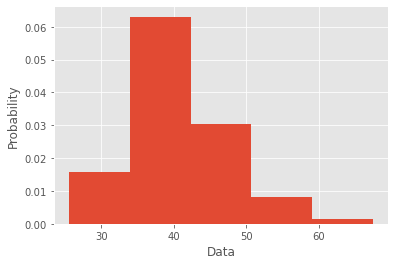

In [179]:
import numpy as np
%matplotlib inline


plt.hist(df.MEDIAN_AGE, density=True, bins=5)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

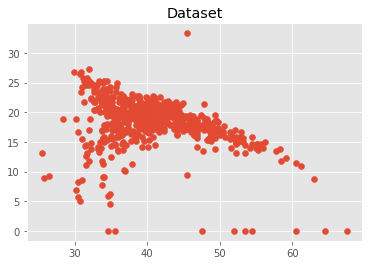

In [169]:
# Creating the data
x1 = df.MEDIAN_AGE.to_numpy()
x2 = df.PERCENTAGE.to_numpy()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
 
# Visualizing the data
plt.plot()

plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

In [170]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 24)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

C:\Users\Dell-672206\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "
C:\Users\Dell-672206\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


In [171]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 6.386248528042516
2 : 4.5256274950094975
3 : 3.817230355739544
4 : 3.278430436353779
5 : 2.9021138719579858
6 : 2.6889165614117956
7 : 2.40925276300187
8 : 2.2024541115167504
9 : 2.060281153620257
10 : 1.9590615267696927
11 : 1.9104824300810226
12 : 1.777385185909143
13 : 1.707426098005264
14 : 1.6383131446506798
15 : 1.6003017997915243
16 : 1.5851006107034182
17 : 1.5493129089231648
18 : 1.4776007005217755
19 : 1.4476815121831241
20 : 1.3993769952737107
21 : 1.3931118549502994
22 : 1.3318715655359306
23 : 1.2932839668332907


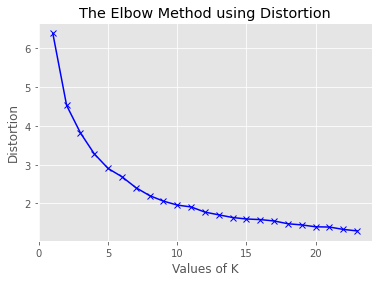

In [172]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [173]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 35142.667944250854
2 : 17539.429085166863
3 : 12940.58471659876
4 : 9244.043221442433
5 : 6984.843044065031
6 : 5748.5992076294115
7 : 4597.682944897307
8 : 4000.0384857536837
9 : 3602.0319273808113
10 : 3281.565131795062
11 : 2967.722992847453
12 : 2727.4602351146855
13 : 2491.6746697924027
14 : 2237.784660080636
15 : 2137.0679750955883
16 : 1916.6792298481087
17 : 1795.6208683311115
18 : 1702.121862618504
19 : 1582.7090718809086
20 : 1528.637835900109
21 : 1429.9928415319148
22 : 1346.8053290287978
23 : 1268.1790277392283


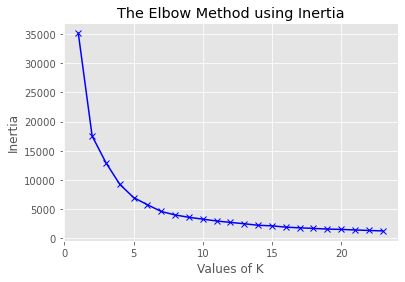

In [174]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

[[40.07336449 19.18738318]
 [47.07966102 17.47288136]
 [33.51071429 11.94107143]
 [34.42068966 21.67448276]
 [55.28536585 11.73170732]]
[1 0 0 0 0 3 1 1 1 0 1 4 1 1 4 4 1 4 4 4 4 0 1 0 0 0 1 0 1 1 1 0 3 1 0 0 1
 0 0 1 0 1 0 0 3 1 0 0 0 1 0 1 1 1 0 3 0 3 3 1 1 0 1 1 0 1 0 1 0 1 1 3 4 1
 0 0 3 0 0 1 4 1 0 0 0 4 0 1 4 1 3 3 0 0 0 1 3 1 3 3 3 0 0 0 0 3 3 0 1 3 3
 0 3 0 3 3 3 1 1 4 0 0 4 0 3 0 0 0 0 3 4 0 0 0 1 4 3 0 1 0 1 3 0 0 0 0 3 0
 0 0 2 2 1 4 4 4 0 1 1 4 1 4 0 4 1 1 1 0 4 1 1 4 1 3 0 1 0 0 1 1 0 1 1 1 1
 1 1 3 0 1 1 1 0 1 1 4 3 3 3 0 3 1 1 0 3 3 1 0 1 0 0 0 1 1 1 1 0 1 3 1 1 1
 0 0 0 0 0 3 3 0 2 4 2 1 0 2 2 4 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 4
 3 0 0 1 1 0 1 1 0 0 1 0 3 3 3 0 4 4 4 4 4 0 3 1 4 1 4 4 4 3 1 0 1 4 3 0 1
 0 0 1 0 0 0 0 3 0 1 1 0 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 1 3 2 0
 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 0 0 2 0 0 0 0 2 2 0 0 2 2 2 3 3 3 3
 0 0 0 3 3 3 0 2 0 3 3 3 3 2 0 0 0 0 0 2 2 3 0 2 2 0 2 1 0 2 0 0 0 0 0 2 2
 0 0 2 0 2 2 0 3 3 0 2 0 0 0 0 3 0 3 0 

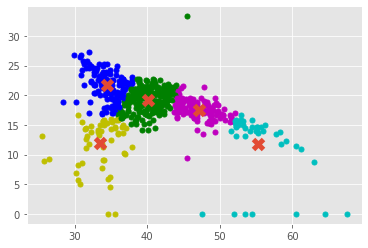

In [175]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

from sklearn.cluster import KMeans



kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

centroid = kmeans.cluster_centers_
labels = kmeans.labels_

print (centroid)
print(labels)

colors = ["g.","m.","y.","b.","c.","k.","w.","r.","g.","b.","c.","m.","k."]


#colors[labels[i]],
for i in range(len(X)):
   print ("coordinate:" , X[i], "label:", labels[i])
   plt.plot(X[i][0],X[i][1],colors[labels[i]],markersize=10)

plt.scatter(centroid[:,0],centroid[:,1], marker = "x", s=100, linewidths = 5, zorder =100)

plt.show()



In [204]:
as2=pd.DataFrame()

for i in range(len(X)):

    as2.append(pd.DataFrame(X[i]).T,pd.DataFrame(labels[i]))

ValueError: DataFrame constructor not properly called!

In [205]:
pd.DataFrame(X[1]).T

,0,1
0,38.4,19.5


In [195]:
for class_ in range(5):
    print(f"Class: {class_}:")
    print(X[labels==class_])

Class: 0:
[[38.4 19.5]
 [36.7 16.5]
 [36.4 17.1]
 [38.8 22.2]
 [39.7 17.3]
 [39.5 18.5]
 [40.4 20.6]
 [43.4 21.2]
 [40.6 21.4]
 [41.3 21.1]
 [39.7 16.8]
 [38.5 20.3]
 [38.8 21.3]
 [42.4 19.1]
 [42.1 18.3]
 [41.5 21.3]
 [40.1 19.7]
 [39.9 19.8]
 [39.8 20.2]
 [40.7 18.2]
 [41.7 17.3]
 [39.2 19.7]
 [37.3 19.5]
 [39.4 20. ]
 [39.8 22.6]
 [41.7 19.9]
 [38.5 20.9]
 [42.6 20.3]
 [42.8 20.6]
 [40.  18.5]
 [42.3 21.8]
 [42.6 18.7]
 [41.6 18.2]
 [41.8 17.1]
 [43.4 20.5]
 [43.  21.6]
 [40.6 22.1]
 [41.5 21. ]
 [43.5 21.4]
 [43.  20.8]
 [44.1 20.8]
 [41.1 22.1]
 [40.3 18.6]
 [42.8 20.1]
 [42.4 21.1]
 [38.2 20.3]
 [38.4 20.9]
 [42.4 19.6]
 [39.6 20.6]
 [40.5 19.9]
 [39.  20.6]
 [42.8 20.1]
 [40.1 18.9]
 [39.3 18.3]
 [38.1 19.4]
 [41.2 19.1]
 [38.8 18.2]
 [43.4 19.2]
 [41.2 18.2]
 [41.8 18.1]
 [38.7 16.3]
 [40.5 18.3]
 [38.  21.1]
 [42.3 20.5]
 [39.4 21.1]
 [40.4 20.2]
 [41.3 17.8]
 [43.1 20.8]
 [38.8 19.1]
 [44.  21.8]
 [40.5 18.3]
 [42.7 20.1]
 [43.2 20. ]
 [40.5 21.2]
 [40.8 22.8]
 [38.9 19.2]
 [

In [194]:
FR=pd.read_csv("FinRes.csv",sep=":")

In [187]:
FR

,coordinate,[49.6 17.1] label,1
0,coordinate,[38.4 19.5] label,0
1,coordinate,[36.7 16.5] label,0
2,coordinate,[36.4 17.1] label,0
3,coordinate,[38.8 22.2] label,0
4,coordinate,[37. 22.2] label,3
...,...,...,...
568,coordinate,[35. 14.3] label,2
569,coordinate,[37.3 18. ] label,0
570,coordinate,[38.6 22.8] label,0
571,coordinate,[39.6 21.4] label,0


In [207]:
sa2 = pd.DataFrame(X, columns=['Median_Age','Percentage'])
sa2['cluster']= pd.DataFrame(labels, columns=['cluster'])
sa2['SA2_Main16']=""
for i in range(len(sa2)):
    if (sa2['Median_Age'][i]== df.iloc[i,1]) & (sa2['Percentage'][i] == df.iloc[i,2]):
        sa2['SA2_Main16'][i] == df.iloc[i,0]

IndexError: single positional indexer is out-of-bounds